In [49]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Naim Rihan/Data.csv')

In [50]:
df.head() 

,created,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,...,distance,ride_distance,price,ride_price,price_review_status,price_review_reason,is_successful_payment,name,card_bin,failed_attempts
0,2016-01-23 23:10:07,motorolaXT1562,motorola6.0.1,ee,2.0,58.378220,26.710402,58.363243,26.737696,218,...,773,3017,4.5000,4.5000,ok,NaN,1,**** 0810,NaN,0
1,2016-05-04 06:01:32,iPhone6,iOS10.3.3,ee,1.0,59.424130,24.646359,59.397548,24.660957,266,...,43,4241,4.4000,4.4000,ok,NaN,1,**** 9115,NaN,0
2,2016-08-27 16:42:22,HTCHTC 10,HTC7.0,ee,1.0,59.413508,24.743706,59.448500,24.804887,551,...,1654,6347,7.2000,7.2000,ok,NaN,1,**** 0634,516903.0,0
3,2016-10-25 07:14:27,iPhone6S,iOS10.3.2,ee,1.0,59.419938,24.744795,59.431686,24.720801,798,...,883,2638,3.1000,3.1000,ok,NaN,1,**** 8730,541747.0,0
4,2016-09-09 12:46:47,"iPhone5,2",iOS9.3.4,ee,1.0,59.471328,24.890557,59.427836,24.774460,944,...,1109,10288,9.0999,9.0999,ok,NaN,1,**** 3503,NaN,0


In [51]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count     304052
unique        22
top           za
freq       78694
Name: country, dtype: object
mode:  0    za
dtype: object
za    78694
lv    55707
ee    43780
hu    23137
lt    20862
ro    18127
ge    12795
cz     9648
ua     7652
az     7010
mx     6798
pl     6037
sk     4888
ke     3427
rs     3006
mt     1045
eg      501
ng      483
fi      397
gh       56
ca        1
sa        1
Name: country, dtype: int64


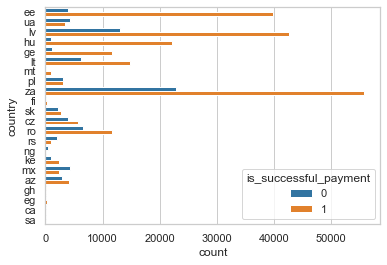

In [69]:
c_palette = ['tab:blue', 'tab:orange']

categorical_summarized(df, y = 'country', hue='is_successful_payment', palette=c_palette)

# Result 1  about country

ZA: "South Africa" IV: "Côte d'Ivoire"

It is noticeable that there is a problem with these two regions and therefore certain restrictions must be placed in order to pay the ride for the first time

For example:
    
1- Prevent the postpaid option to be only prepaid.

2 - Forcing the initial charged balance to be twice the price of the first flight.

3- A credit balance cut by the company before the start of any trip by the customer to reserve its right

In [86]:
df_zeros = df[df['is_successful_payment']==0]
df_zeros

,created,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,...,distance,ride_distance,price,ride_price,price_review_status,price_review_reason,is_successful_payment,name,card_bin,failed_attempts
18,2017-06-14 13:00:25,OnePlusONEPLUS A3003,OnePlus7.1.1,ee,1.0,59.420321,24.697136,59.330578,24.472601,2853,...,491,19033,0.0,0.0,ok,NaN,0,**** 2822,516867.0,0
34,2016-03-03 15:11:32,OnePlusONE E1003,OnePlus6.0.1,ee,1.0,59.416350,24.692010,59.406597,24.658743,5031,...,1461,2775,0.0,0.0,ok,NaN,0,**** 8997,529412.0,0
39,2016-01-22 07:02:45,iPhone7,iOS10.1,ee,1.0,59.412517,24.648007,59.399812,24.669028,5820,...,307,2947,0.0,0.0,ok,NaN,0,**** 1472,516737.0,0
52,2015-12-12 22:02:40,samsungSM-G930F,samsung7.0,ee,1.0,59.390862,24.721267,59.305744,24.671476,10115,...,1421,10453,8.8,8.8,ok,NaN,0,**** 9380,516737.0,0
57,2016-02-12 23:06:59,SonyF5121,Sony7.0,ee,1.0,59.411968,24.650227,59.433578,24.795090,10997,...,899,11286,0.0,0.0,ok,NaN,0,**** 9779,557014.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304035,2017-01-17 05:27:15,samsungSM-N900,samsung5.0,za,54.0,-26.014147,28.101215,-26.035955,28.068351,1059244,...,1797,5479,55.0,55.0,ok,NaN,0,**** 8655,522262.0,0
304036,2017-02-14 19:26:53,HTCHTC One_M8,HTC6.0,za,54.0,-26.083742,27.876919,-26.072602,27.887509,1190156,...,3439,1906,0.0,25.0,ok,NaN,0,**** 0324,484162.0,0
304038,2017-05-22 15:10:27,iPhone7,iOS10.3.3,za,55.0,-34.083962,18.849969,-34.063482,18.812826,1290671,...,129,1945,0.0,20.0,ok,NaN,0,**** 0039,402167.0,2
304039,2017-05-06 00:37:16,samsungSM-G900H,samsung6.0.1,za,55.0,-33.820529,18.478342,-33.816071,18.496946,1390289,...,79,23390,175.0,175.0,ok,NaN,0,**** 6124,528497.0,0


city_id  is_successful_payment
54.0     0                        14788
3.0      0                        12890
325.0    0                         6555
55.0     0                         6309
317.0    0                         4355
158.0    0                         4210
9.0      0                         3943
271.0    0                         3899
1.0      0                         3335
307.0    0                         3010


<AxesSubplot:xlabel='city_id,is_successful_payment'>

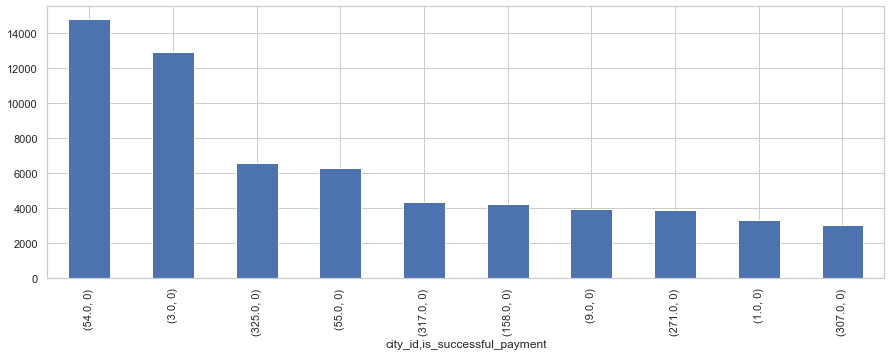

In [92]:
outa = df_zeros[['city_id','is_successful_payment']].value_counts().nlargest(10)
print(outa.to_string())
outa.plot(kind='bar', figsize=(15,5))

# Result 2  about Cities

We can notice in a very clear way that the cities with (54 - 3 - 325 - 55 - 317) Ids have a lot of zeros as a result to 
is_successful_payment

This indicates that some areas really have a payment problem and this problem should be addressed, for example:

1- There may be poor internet connection, which prevents the payment process from being completed well

2- There may be a lack of information on how to complete the payment process

etc.

count                            1108
unique                              3
top       price_too_high             
freq                             1005
Name: price_review_reason, dtype: object
mode:  0    price_too_high             
dtype: object
price_too_high                 1005
calculation_failed               69
price_calculation_warnings       34
Name: price_review_reason, dtype: int64


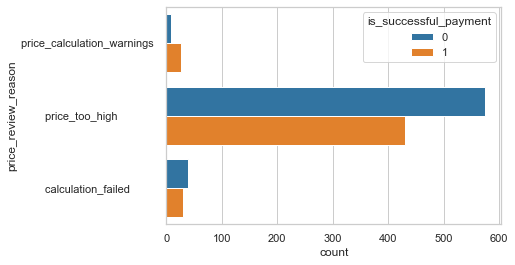

In [61]:
c_palette = ['tab:blue', 'tab:orange']

categorical_summarized(df, y = 'price_review_reason', hue='is_successful_payment', palette=c_palette)

# Result 3  about high price

The most frequent review associated with a failed result is the high price, 

it is possible that the customer refuses to complete the payment process because of the high price

Recommendation here:
    
Perhaps it is worth revisiting the price of rides in some areas!

In [3]:
for col in df:
    print(df[col].unique())

['2016-01-23 23:10:07' '2016-05-04 06:01:32' '2016-08-27 16:42:22' ...
 '2017-07-25 14:00:26' '2017-07-30 14:11:14' '2017-08-08 10:35:40']
['motorolaXT1562' 'iPhone6' 'HTCHTC 10' ...
 'HTCHTC Sensation XL with Beats Audio X315e'
 'GenymotionCustom Phone - 7.0.0 - API 24 - 768x1280'
 'alpsverykool SL5009']
['motorola6.0.1' 'iOS10.3.3' 'HTC7.0' ... 'ALIGATOR S50606.0' 'ERGO5.1'
 'Genymotion7.0']
['ee' 'ua' 'lv' 'hu' 'ge' 'lt' 'mt' 'pl' 'za' 'fi' 'sk' 'cz' 'ro' 'rs'
 'ng' 'ke' 'mx' 'az' 'gh' nan 'eg' 'ca' 'sa']
[  2.   1.   6. 164. 158.   3.   7.  15.   9. 324.  13.  nan 307.  28.
   4.  55. 161. 326. 271. 250.  54. 325. 260.  10. 273. 136. 278. 320.
 317. 338. 242. 335. 137. 279. 353. 348.  38. 244. 341. 174. 297. 371.]
[ 58.37822   59.42413   59.413508 ...  41.709336 -26.077051 -26.009115]
[26.710402 24.646359 24.743706 ... 28.084813 26.020226 28.216854]
[ 58.363243  59.397548  59.4485   ... -25.724357  41.693171 -26.095041]
[26.737696 24.660957 24.804887 ... 28.132867 28.080559 28.1527

In [3]:
# Move Target column to the end

df[[c for c in df if c not in ['is_successful_payment']] 
       + ['is_successful_payment']]

,created,device_name,device_os_version,country,city_id,lat,lng,real_destination_lat,real_destination_lng,user_id,...,distance,ride_distance,price,ride_price,price_review_status,price_review_reason,name,card_bin,failed_attempts,is_successful_payment
0,2016-01-23 23:10:07,motorolaXT1562,motorola6.0.1,ee,2.0,58.378220,26.710402,58.363243,26.737696,218,...,773,3017,4.5000,4.5000,ok,NaN,**** 0810,NaN,0,1
1,2016-05-04 06:01:32,iPhone6,iOS10.3.3,ee,1.0,59.424130,24.646359,59.397548,24.660957,266,...,43,4241,4.4000,4.4000,ok,NaN,**** 9115,NaN,0,1
2,2016-08-27 16:42:22,HTCHTC 10,HTC7.0,ee,1.0,59.413508,24.743706,59.448500,24.804887,551,...,1654,6347,7.2000,7.2000,ok,NaN,**** 0634,516903.0,0,1
3,2016-10-25 07:14:27,iPhone6S,iOS10.3.2,ee,1.0,59.419938,24.744795,59.431686,24.720801,798,...,883,2638,3.1000,3.1000,ok,NaN,**** 8730,541747.0,0,1
4,2016-09-09 12:46:47,"iPhone5,2",iOS9.3.4,ee,1.0,59.471328,24.890557,59.427836,24.774460,944,...,1109,10288,9.0999,9.0999,ok,NaN,**** 3503,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304048,2017-06-21 05:05:50,iPhone6S,iOS10.2.1,za,54.0,-25.746974,28.114173,-25.748204,28.132867,1916704,...,2640,3334,40.0000,40.0000,ok,NaN,**** 2904,523982.0,0,1
304049,2017-07-03 12:34:48,iPhone6,iOS10.3.2,ge,15.0,41.709336,44.802954,41.693171,44.803201,2017910,...,608,3959,4.4000,4.4000,ok,NaN,**** 9886,431572.0,0,1
304050,2017-07-25 14:00:26,BoostShaker-Slim,Boost4.4.2,za,54.0,-26.077051,28.084813,-26.095041,28.080559,2086329,...,1566,2936,30.0000,30.0000,ok,NaN,**** 8607,425668.0,0,1
304051,2017-07-30 14:11:14,iPhone6,iOS10.3.2,ro,325.0,44.441192,26.020226,44.435512,26.116617,2161013,...,1723,9708,23.8999,23.8999,ok,NaN,**** 6850,554593.0,0,1


In [5]:
df['is_successful_payment'].value_counts()

1    225020
0     79033
Name: is_successful_payment, dtype: int64

In [6]:
df['is_successful_payment'].value_counts()

1    225020
0     79033
Name: is_successful_payment, dtype: int64

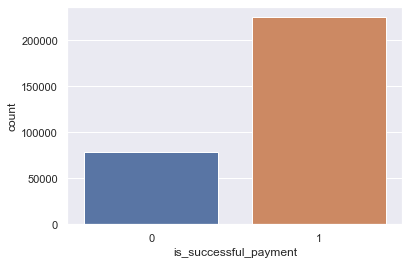

In [8]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="is_successful_payment", data=df)

In [11]:
df = df.drop(['name','device_os_version','created','order_id','order_try_id','city_id','lat','lng','real_destination_lat','real_destination_lng','user_id'], axis = 1)

In [12]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['device_name'] = labelencoder.fit_transform(df['device_name']) #fitting and transforming
df['country'] = labelencoder.fit_transform(df['country'])
df['price_review_status'] = labelencoder.fit_transform(df['price_review_status'])
df['price_review_reason'] = labelencoder.fit_transform(df['price_review_reason'])

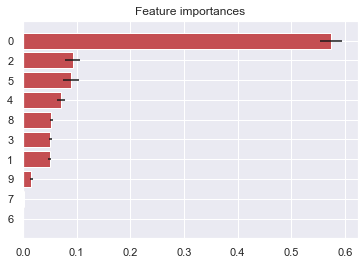

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
                              

X = df[['price','device_name','country','distance','ride_distance','ride_price','price_review_status','price_review_reason','card_bin','failed_attempts','is_successful_payment']].dropna()
y = X.pop('is_successful_payment')

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()

In [14]:
df1= df.loc[df['is_successful_payment'] == 0, '']
df1

18          0.0
34          0.0
39          0.0
52          8.8
57          0.0
          ...  
304035     55.0
304036      0.0
304038      0.0
304039    175.0
304046      0.0
Name: price, Length: 79033, dtype: float64

<AxesSubplot:>

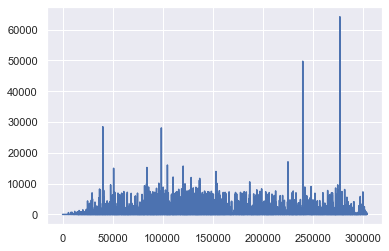

In [15]:
s = pd.Series(df1)
s.plot.line()

In [16]:
import numpy

A = numpy.mean(df1)
A

84.11743393139542

In [17]:
import numpy

A = numpy.max(df1)
A

64210.0

In [18]:
import numpy

A = numpy.min(df1)
A

0.0

In [39]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
df2= df.loc[df['is_successful_payment'] == 1, 'price']
df2

0          4.5000
1          4.4000
2          7.2000
3          3.1000
4          9.0999
           ...   
304048    40.0000
304049     4.4000
304050    30.0000
304051    23.8999
304052    55.0000
Name: price, Length: 225020, dtype: float64

<AxesSubplot:>

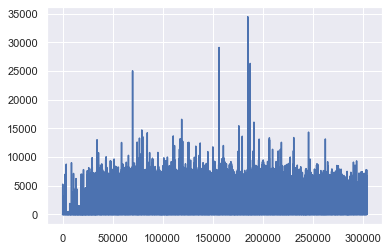

In [20]:
s = pd.Series(df2)
s.plot.line()

In [21]:
import numpy

A = numpy.mean(df2)
A

316.9004819093053

In [22]:
import numpy

A = numpy.max(df2)
A

34460.0

In [23]:
import numpy

A = numpy.min(df2)
A

0.02

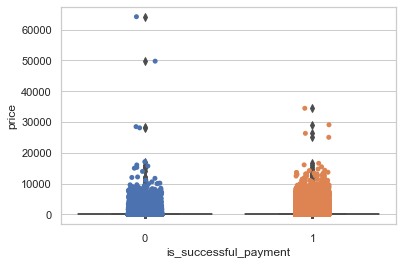

In [54]:
# Boxplot with Seaborn
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='is_successful_payment',y='price',data=df)
ax = sns.stripplot(x="is_successful_payment", y="price",data=df)

# Result 4  about price

After arranging the features according to the degree of their impact on the target feature,
we find that the due ride price is of paramount importance in the emergence of failed payments,
but because of lot of overlapping between 0 and 1 with Price. 
We cannot use the price variable alone to classify.


<AxesSubplot:xlabel='is_successful_payment', ylabel='price'>

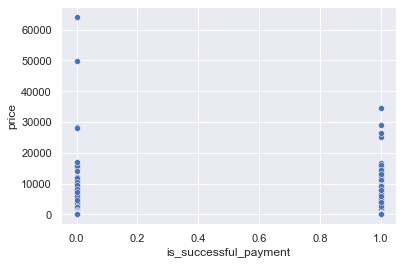

In [29]:
import seaborn as sns

sns.scatterplot(data=df, x='is_successful_payment', y='price')

In [33]:
df3= df.loc[df['is_successful_payment'] == 1, 'ride_distance']
B = numpy.mean(df3)
B

9462.326530975024

In [35]:
df4= df.loc[df['is_successful_payment'] == 0, 'ride_distance']
C = numpy.mean(df4)
C

9317.228524793441

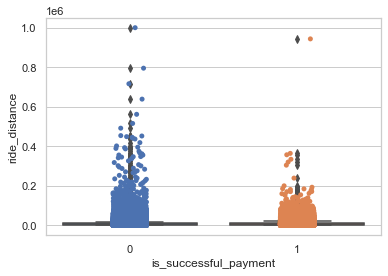

In [72]:
# Boxplot with Seaborn
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='is_successful_payment',y='ride_distance',data=df)
ax = sns.stripplot(x="is_successful_payment", y="ride_distance",data=df)

# Result 5 about ride distance

There is lot of overlapping between 0 and 1 ride distance. 
so we cannot use the ride distance variable alone to classify.

# To Recap

# The proposed solutions:

1- Ensure that some areas are free of technical problems, such as poor internet service.

2- Ensuring that the customer has sufficient knowledge of the pricing policy about flights by giving him some examples.

3- It is possible for the company to deduct a credit balance to preserve its right in case it fails to recover its debts.

4- Make the ride service prepaid, not postpaid.

5- Very important: Giving the user an option that enables him to check whether his current balance can take him to his destination or not, if yes, then he can place an order

Done by: Naim Rihan    naimrihan93@gmail.com